<a href="https://colab.research.google.com/github/it5joys135/ML-Projects/blob/main/SVM_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
data = files.upload()

Saving cement_slump.csv to cement_slump (1).csv


In [ ]:
df = pd.read_csv('cement_slump.csv')
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [ ]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

<Axes: >

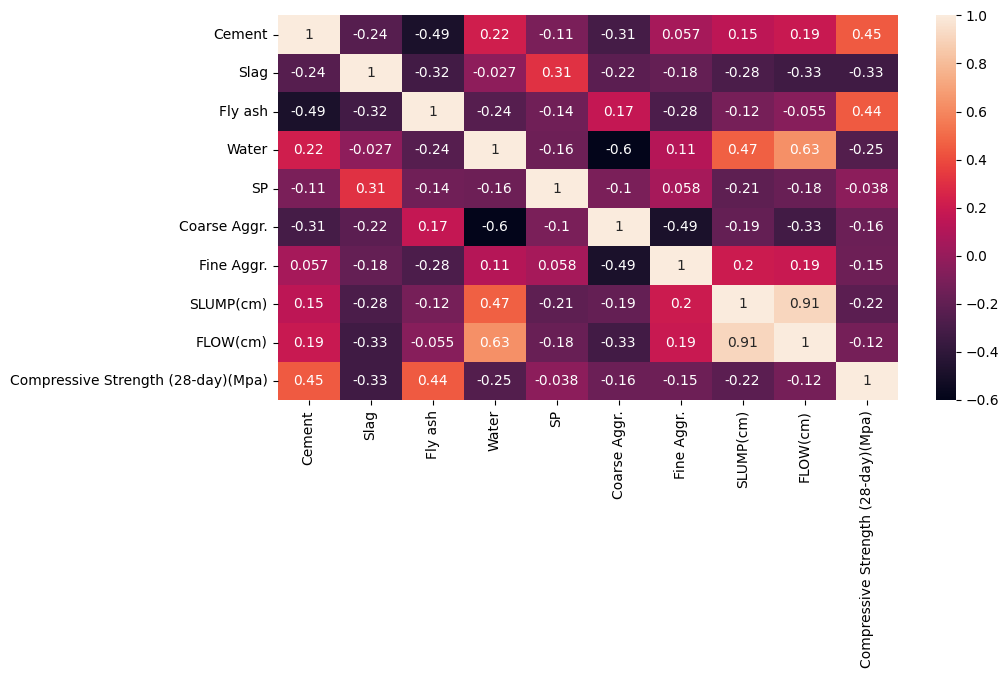

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True)

In [ ]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVR

In [ ]:
base_model = SVR()

In [ ]:
base_model.fit(scaled_X_train, y_train)

SVR()

In [ ]:
base_model_pred = base_model.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(y_test, base_model_pred)

5.236902091259178

In [ ]:
np.sqrt(mean_squared_error(y_test, base_model_pred))

6.695914838327133

In [ ]:
y_test.mean()

36.26870967741935

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': ['scale', 'auto'],
              'epsilon': [0, 0.01, 0.1, 0.5, 1, 2]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
svr = SVR()

In [ ]:
grid = GridSearchCV(svr, param_grid)

In [ ]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
grid.best_params_

{'C': 1, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
y_pred = grid.predict(scaled_X_test)

In [ ]:
mean_absolute_error(y_test, y_pred)

2.5128012210762365

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.178210305119858